<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Analyse_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Télécharger les données de l'action Apple
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
# ça fonctionne même si yfinance renvoie un DataFrame multi-niveaux
apple.columns = apple.columns.droplevel('Ticker')
apple.dropna(inplace=True)
apple.tail()

C:\Users\Asus\AppData\Local\Temp\ipykernel_544\114952126.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500


In [ ]:
apple["diff"] = apple["Close"].diff()
apple.head()

Price,Close,High,Low,Open,Volume,diff
Date,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,NaN
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.706009
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.573013
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,-0.340919
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,1.160583


In [ ]:

# Séparer les gains et pertes
apple['gain'] = apple['diff'].apply(lambda x: x if x > 0 else 0)
apple['loss'] = apple['diff'].apply(lambda x: -x if x < 0 else 0)

In [ ]:
# Période du RSI
window = 14

In [ ]:

# Moyenne mobile simple sur 14 jours (utiliser ewm pour plus de fluidité)
apple['avg_gain'] = apple['gain'].rolling(window=window).mean()
apple['avg_loss'] = apple['loss'].rolling(window=window).mean()


In [ ]:
apple

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain,avg_loss
Date,,,,,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,NaN,0.000000,0.000000,NaN,NaN
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.706009,0.000000,0.706009,NaN,NaN
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.573013,0.573013,0.000000,NaN,NaN
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,-0.340919,0.000000,0.340919,NaN,NaN
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,1.160583,1.160583,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,0.778122,0.778122,0.000000,1.391644,0.492384
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,2.922958,2.922958,0.000000,1.574775,0.492384
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,0.817993,0.817993,0.000000,1.631065,0.492384


In [ ]:
# Calcul du RS (relative strength)
apple['rs'] = apple['avg_gain'] / apple['avg_loss']
apple

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain,avg_loss,rs
Date,,,,,,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,NaN,0.000000,0.000000,NaN,NaN,NaN
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.706009,0.000000,0.706009,NaN,NaN,NaN
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.573013,0.573013,0.000000,NaN,NaN,NaN
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,-0.340919,0.000000,0.340919,NaN,NaN,NaN
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,1.160583,1.160583,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,0.778122,0.778122,0.000000,1.391644,0.492384,2.826341
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,2.922958,2.922958,0.000000,1.574775,0.492384,3.198267
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,0.817993,0.817993,0.000000,1.631065,0.492384,3.312590


In [ ]:

# Calcul du RSI
apple['RSI'] = 100 - (100 / (1 + apple['rs']))

apple['RSI'].describe()

count    1244.000000
mean       54.989778
std        17.233594
min         3.180166
25%        42.579666
50%        55.840675
75%        68.366884
max        96.163051
Name: RSI, dtype: float64

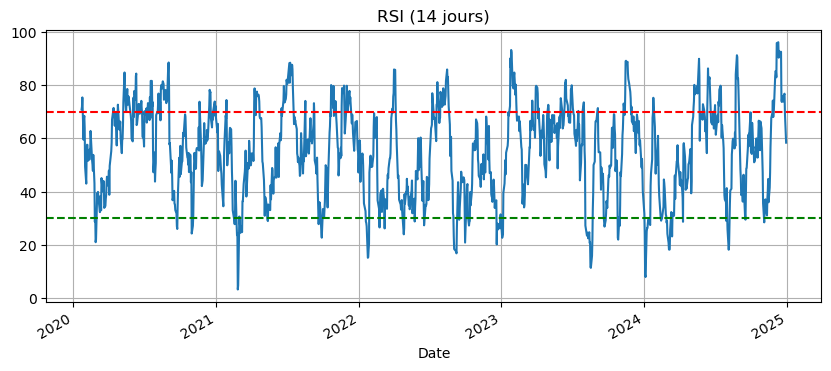

In [ ]:

plt.figure(figsize=(10, 4))
apple['RSI'].plot(title='RSI (14 jours)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid()
plt.show()

In [ ]:
apple["EMA_12"] = apple["Close"].ewm(span=12, adjust=False).mean()
apple["EMA_26"] = apple["Close"].ewm(span=26, adjust=False).mean()
apple["MACD"] = apple["EMA_12"] - apple["EMA_26"]
apple["Signal"] = apple["MACD"].ewm(span=9, adjust=False).mean()
apple["Histogram"] = apple["MACD"] - apple["Signal"]

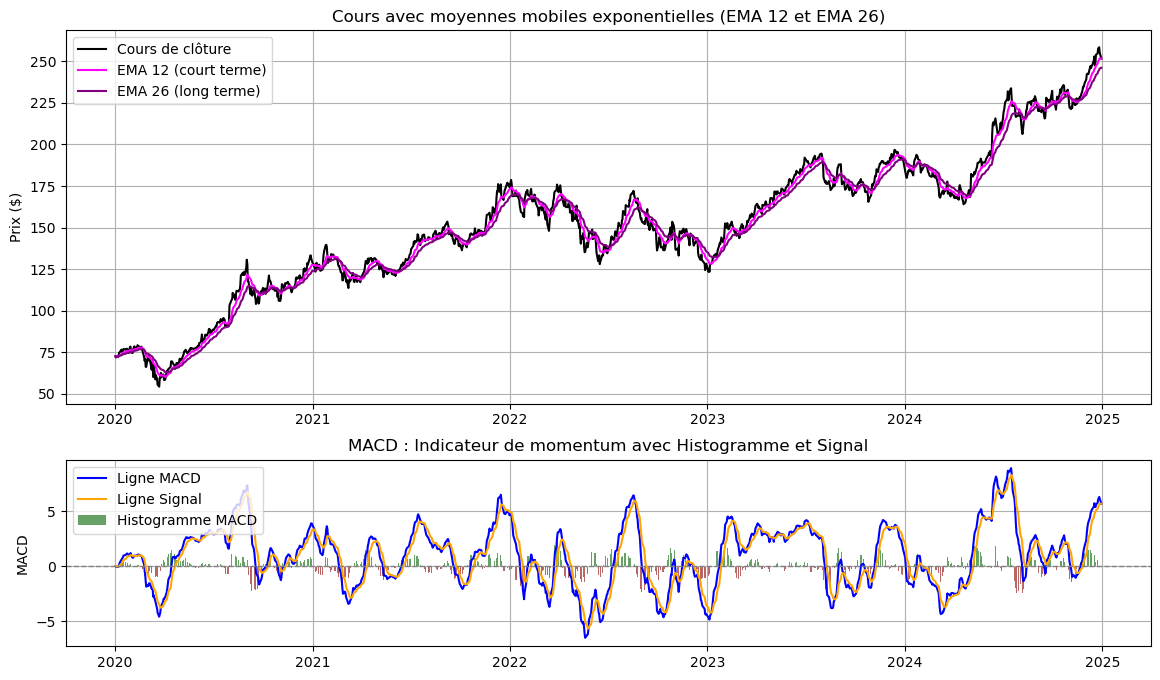

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Couleurs personnalisées pour l'histogramme
colors = ['darkgreen' if val >= 0 else 'darkred' for val in apple['Histogram']]

# Grille avec 2 sous-graphiques
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.2)


# ----- 1. Grahique des prix + EMA -----
ax1 = plt.subplot(gs[0])
ax1.plot(apple['Close'], label='Cours de clôture', color='black')
ax1.plot(apple['EMA_12'], label='EMA 12 (court terme)', color='magenta')
ax1.plot(apple['EMA_26'], label='EMA 26 (long terme)', color='purple')
ax1.set_title("Cours avec moyennes mobiles exponentielles (EMA 12 et EMA 26)")
ax1.set_ylabel("Prix ($)")
ax1.legend(loc='upper left')
ax1.grid(True)

# ----- 2. Grahique MACD -----
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.bar(apple.index, apple['Histogram'], color=colors, alpha=0.6, label='Histogramme MACD')
ax2.plot(apple['MACD'], label='Ligne MACD', color='blue')
ax2.plot(apple['Signal'], label='Ligne Signal', color='orange')
ax2.axhline(0, color='gray', linewidth=1, linestyle='--')
ax2.set_title("MACD : Indicateur de momentum avec Histogramme et Signal")
ax2.set_ylabel("MACD")
ax2.legend(loc='upper left')
ax2.grid(True)

In [ ]:
def calculate_obv(data):
    """
    Calcuke l'indicateur technique OBV(On-Balance Volume) à partir des colonnes 'Close et 'Volume'.

    L'OBV mesure la pression d'achat et de vente à l'aide des volumes :
    - Si le prix de clôture du jour est supérieur à celui de la veille -> on ajoute le volume au cumul.
    - S'il est inférieur -> on soustrait le volume.
    - S'il est égal -> l'OBV reste inchangé.

    Paramètres :
    -----------
    data : pd.DataFrame
        Un DataFrame contenant au minimum les colonnes 'Close' (cours de clôture) et 'Volume' (volume d'échange).

    Retour :
    --------
    pd.Data.Frame
        Le même DataFrame avec une colonne supplémentaire 'OBV' représentant l'indicateur On-Balance Volume.

    Exemple :
    ---------
    >>> df = calculate_obv(df[['Close', 'Volume']])
    >>> df[['Close', 'OBV']].plot()
    """
    obv = [0] # Initialiser avec 0
    close = data['Close'].values
    volume = data['Volume'].values

    for i in range(1, len(data)):
        if close[i] > close[i - 1]:
            obv.append(obv[-1] + volume[i])
        elif close[i] < close[i - 1]:
            obv.append(obv[-1] - volume[i])
        else:
            obv.append(obv[-1])

    data = data.copy() # Pour éviter les effets de bord
    data['OBV'] = obv
    return data


In [ ]:
apple = calculate_obv(apple)

In [ ]:
apple.head()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain,avg_loss,rs,RSI,EMA_12,EMA_26,MACD,Signal,Histogram,OBV
Date,,,,,,,,,,,,,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,72.620850,72.620850,0.000000,0.000000,0.000000,0
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.706009,0.000000,0.706009,NaN,NaN,NaN,NaN,72.512233,72.568553,-0.056320,-0.011264,-0.045056,-146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.573013,0.573013,0.000000,NaN,NaN,NaN,NaN,72.508482,72.562575,-0.054093,-0.019830,-0.034263,-27935600
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,-0.340919,0.000000,0.340919,NaN,NaN,NaN,NaN,72.452860,72.531787,-0.078927,-0.031649,-0.047278,-136807600
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200,1.160583,1.160583,0.000000,NaN,NaN,NaN,NaN,72.584345,72.589248,-0.004903,-0.026300,0.021397,-4728400


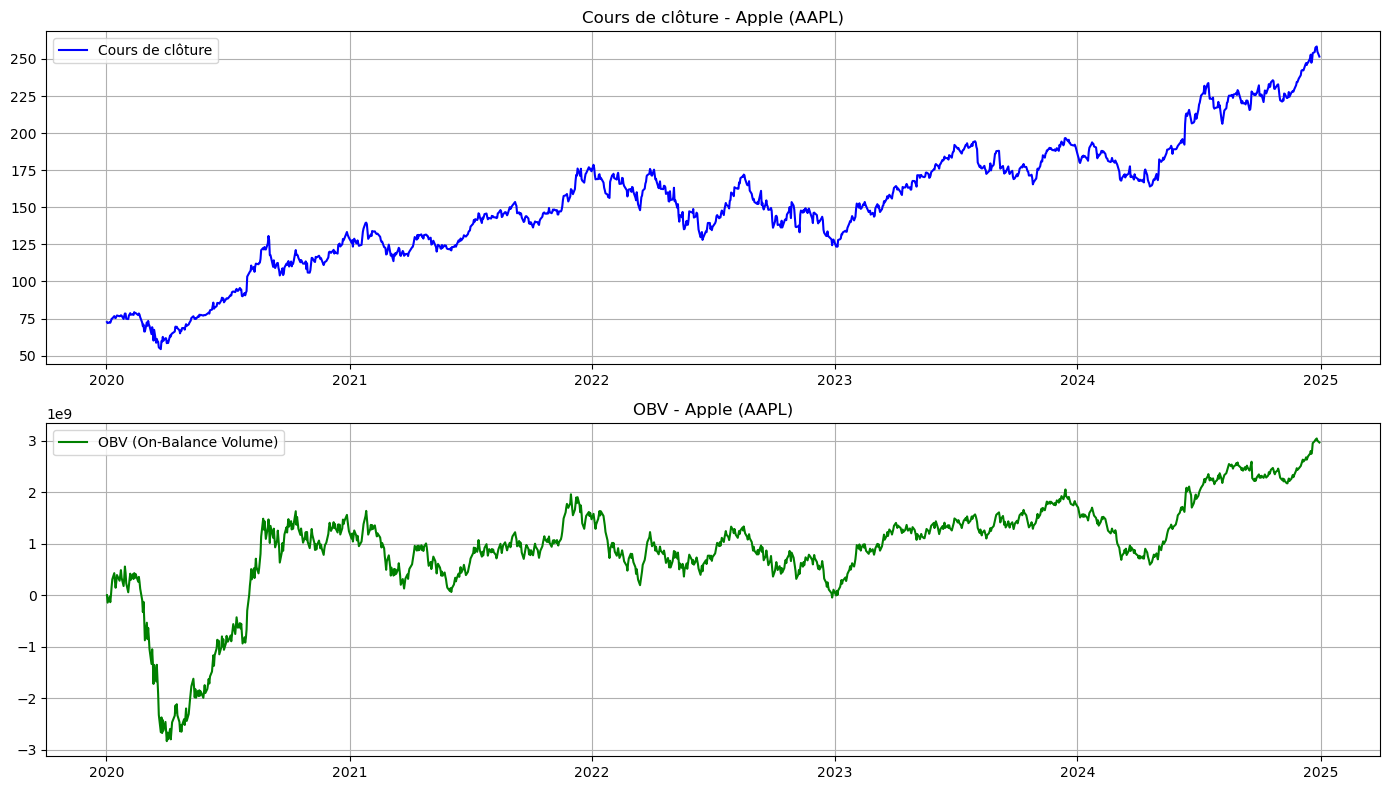

In [ ]:
# 3. Affichage graphique
plt.figure(figsize=(14,8))

# Cours de clôture
plt.subplot(2, 1, 1)
plt.plot(apple['Close'], label='Cours de clôture', color='blue')
plt.title("Cours de clôture - Apple (AAPL)")
plt.legend()
plt.grid()

# OBV
plt.subplot(2, 1, 2)
plt.plot(apple['OBV'], label='OBV (On-Balance Volume)', color='green')
plt.title("OBV - Apple (AAPL)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
plot_data = apple.copy()
plot_data = plot_data.reset_index()

In [ ]:
clv = ((plot_data["Close"]-plot_data["Low"])-(plot_data["High"]-plot_data["Close"]))/(plot_data["High"]-plot_data["Low"])
clv

0       0.907579
1      -0.544120
2       0.955616
3      -0.467831
4       0.656593
          ...   
1252    0.654554
1253    0.993165
1254    0.125493
1255   -0.102840
1256    0.054543
Length: 1257, dtype: float64

In [ ]:
clv.fillna(0)

0       0.907579
1      -0.544120
2       0.955616
3      -0.467831
4       0.656593
          ...   
1252    0.654554
1253    0.993165
1254    0.125493
1255   -0.102840
1256    0.054543
Length: 1257, dtype: float64

In [ ]:
mfv = clv * plot_data["Volume"]

In [ ]:
ad = mfv.cumsum()

In [ ]:
plot_data["CLV"] = clv
plot_data["MFV"] = mfv
plot_data["AD"] = ad

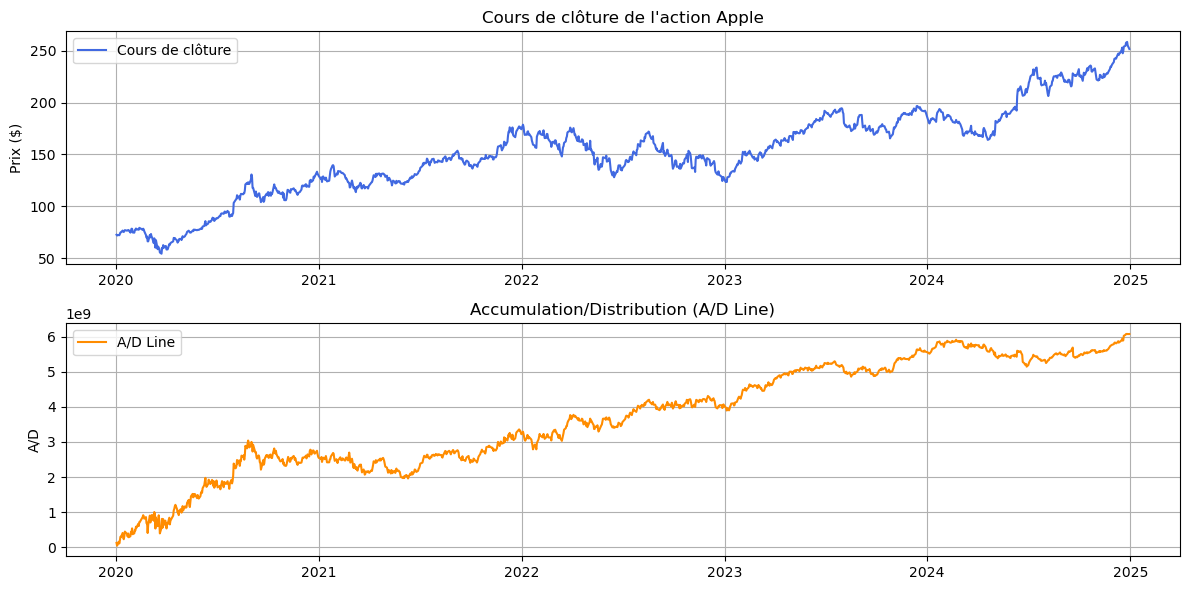

In [ ]:
import matplotlib.pyplot as plt
#Taille globale de la figure
plt.figure(figsize=(12, 6))

# 1. Cours de clôture
plt.subplot(2, 1, 1)
plt.plot(plot_data['Date'], plot_data['Close'], label='Cours de clôture', color='royalblue')
plt.title("Cours de clôture de l'action Apple")
plt.ylabel('Prix ($)')
plt.grid(True)
plt.legend()

# 2. Ligne A/D
plt.subplot(2, 1, 2)
plt.plot(plot_data['Date'], plot_data['AD'], label='A/D Line', color='darkorange')
plt.title("Accumulation/Distribution (A/D Line)")
plt.xlabel
plt.ylabel('A/D')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()